In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

In [2]:
from tqdm import tqdm

In [3]:
column_names = [
    "track_id",         # Track ID
    "race_date",        # Race Date
    "race_number",      # Race Number
    "program_number",   # Program Number
    "weight_carried",   # Weight Carried
    "jockey",           # Jockey Name
    "odds",             # Odds
    "position_at_finish"# Finish Position
]

df_start = pd.read_csv("big-data-derby-2022\\nyra_start_table.csv", header=None, names=column_names)
df_race = pd.read_csv('big-data-derby-2022\\nyra_race_table.csv')

In [4]:
df_start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1


c:\Users\Jayesh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Odds Distribution')

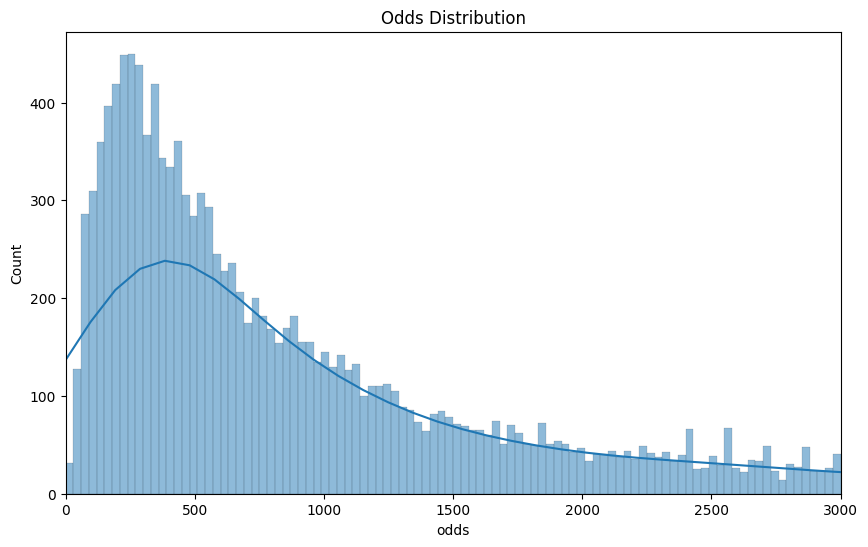

In [8]:
# plot odds distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_start['odds'], bins=100, kde=True, binrange=(0, 3000))
# set x-axis limit
plt.xlim(0, 3000)
plt.title('Odds Distribution')

In [5]:
# add unique_id 
df_race['unique_id'] = df_race["track_id"] + "_" + df_race["race_date"] + "_" + df_race["race_number"].astype(str)
df_start['unique_id'] = df_start["track_id"] + "_" + df_start['race_date'] + "_" + df_start['race_number'].astype(str)

In [6]:
df_start_1 = df_start[df_start['unique_id'] == 'SAR_2019-08-01_2']

In [7]:
# calculate probability using odds
df_start_1['probability'] = 100 / (df_start_1['odds'] + 100)

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_18880\2900706681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start_1['probability'] = 100 / (df_start_1['odds'] + 100)


In [11]:
df_start_1.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish,unique_id,probability
12856,SAR,2019-08-01,2,1,118,Irad Ortiz Jr.,330,6,SAR_2019-08-01_2,0.161777
12857,SAR,2019-08-01,2,1A,124,Luis Saez,330,2,SAR_2019-08-01_2,0.161777
12858,SAR,2019-08-01,2,2,122,Eric Cancel,720,3,SAR_2019-08-01_2,0.084834
12859,SAR,2019-08-01,2,3,124,Chris Landeros,1240,4,SAR_2019-08-01_2,0.051914
12860,SAR,2019-08-01,2,4,124,Jose Lezcano,35,1,SAR_2019-08-01_2,0.515290


In [10]:
sum_probability = df_start_1['probability'].sum()
df_start_1['probability'] = df_start_1['probability'] / sum_probability

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_18880\1628559942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start_1['probability'] = df_start_1['probability'] / sum_probability


In [8]:
track_ids = df_start['unique_id'].unique()

In [9]:
for track_id in track_ids:
    # Create a copy of the subset DataFrame
    df_start_1 = df_start[df_start['unique_id'] == track_id].copy()
    
    # Calculate probabilities
    df_start_1['probability'] = 100 / (df_start_1['odds'] + 100)
    sum_probability = df_start_1['probability'].sum()
    df_start_1['probability'] = df_start_1['probability'] / sum_probability
    
    # Update the original DataFrame with the modified subset
    df_start.loc[df_start['unique_id'] == track_id, 'probability'] = df_start_1['probability']


In [26]:
df_start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish,unique_id,probability
0,AQU,2019-01-01,1,1,123,Dylan Davis,130,2,AQU_2019-01-01_1,0.363059
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3,AQU_2019-01-01_1,0.211401
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4,AQU_2019-01-01_1,0.298227
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5,AQU_2019-01-01_1,0.060510
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1,AQU_2019-01-01_1,0.066803


In [10]:
track_geometry_path = "my-data\\track-geometry\\"

In [46]:
# Function to calculate angles between consecutive vectors
def calculate_angle(v1, v2):
    # Normalize vectors
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    # Dot product and arccos to calculate angle (in radians)
    dot_product = np.dot(v1, v2)
    angle = np.arccos(np.clip(dot_product, -1.0, 1.0))  # Clip for numerical stability
    return np.degrees(angle)  # Convert to degrees

def generate_angles(track_geometry):
    # Add angle calculation to the dataframe
    angles = []
    for i in range(1, len(track_geometry)):
        v1 = np.array([track_geometry.loc[i - 1, 'perp_x'], track_geometry.loc[i - 1, 'perp_y']])
        v2 = np.array([track_geometry.loc[i, 'perp_x'], track_geometry.loc[i, 'perp_y']])
        angle = calculate_angle(v1, v2)
        angles.append(angle)

    angles.insert(0, 0)  # First row has no angle (NaN equivalent)
    track_geometry['angle_change'] = angles
    return track_geometry

def generate_angles_fourth_index(track_geometry):
    angles = []
    
    for i in range(len(track_geometry)):
        if i + 4 < len(track_geometry):
            v1 = np.array([track_geometry.loc[i, 'perp_x'], track_geometry.loc[i, 'perp_y']])
            v2 = np.array([track_geometry.loc[i + 4, 'perp_x'], track_geometry.loc[i + 4, 'perp_y']])
            angle = calculate_angle(v1, v2)
        else:
            angle = 0
        angles.append(angle)
    
    track_geometry['angle_change_fourth'] = angles
    return track_geometry

def generate_transition_indices(track_geometry, start_threshold=1.4, end_threshold=0.8):
    in_transition = False
    transition_indices = []
    for i in range(15, len(track_geometry) - 15):
        angle = track_geometry['angle_change'][i]

        if angle > start_threshold and not in_transition:
            # Transition starts
            in_transition = True
            transition_indices.append(i)  # Mark start of transition

        elif angle < end_threshold and in_transition:
            if len(transition_indices) > 0 and i - transition_indices[-1] < 10:
                transition_indices.pop()
                in_transition = False
            # Transition ends
            in_transition = False
            transition_indices.append(i)  # Mark end of transition
    if len(transition_indices) % 2 != 0:
        transition_indices.pop()
    return transition_indices

In [47]:

transition_indices = {}
for track_id in tqdm(track_ids):
    try:
        track_geometry = pd.read_csv(track_geometry_path + track_id + ".csv")
        # track_geometry = generate_angles_fourth_index(track_geometry)
        transition_index = generate_transition_indices(track_geometry)
        transition_indices[track_id] = transition_index 
    except FileNotFoundError:
        pass

100%|██████████| 2000/2000 [00:10<00:00, 188.84it/s]


In [35]:
track_geometry = pd.read_csv(track_geometry_path + "AQU_2019-01-01_4.csv")
track_geometry = generate_angles_fourth_index(track_geometry)
track_geometry.head()

,mid_easting,mid_northing,perp_x,perp_y,angle_change,cumulative_distance,A,B,C,angle_change_fourth
0,0.000000,0.000000e+00,0.938810,-0.344435,0.000000,0.000000,-0.344435,-0.938810,4.433684e+06,0.768496
1,598731.374414,4.502997e+06,0.938810,-0.344435,0.000000,1.142726,-0.344435,-0.938810,4.433683e+06,1.037768
2,598730.868203,4.502995e+06,0.940335,-0.340250,0.255234,2.622773,-0.340250,-0.940335,4.438042e+06,1.079919
3,598730.240579,4.502993e+06,0.940953,-0.338537,0.104297,4.472387,-0.338537,-0.940953,4.439797e+06,1.374943
4,598729.529824,4.502991e+06,0.943345,-0.331813,0.408966,6.594215,-0.331813,-0.943345,4.446542e+06,1.134451


c:\Users\Jayesh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


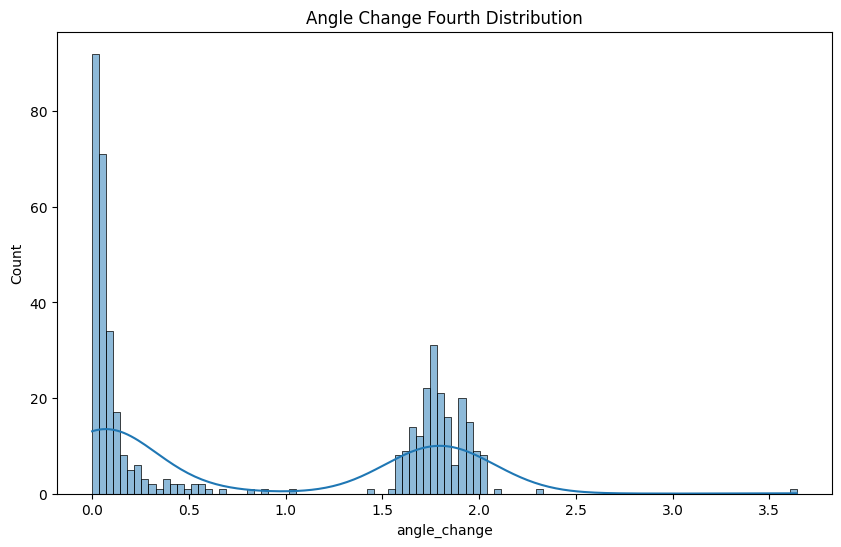

In [36]:
# plot angle change fourth
plt.figure(figsize=(10, 6))
sns.histplot(track_geometry['angle_change'], bins=100, kde=True)
plt.title('Angle Change Fourth Distribution')
plt.show()

In [25]:
len(transition_indices)

1994

In [55]:
horse_tracking_path = "my-data\\horse-tracking-data-features\\"
# load one sample 
df_horse_tracking = pd.read_csv(horse_tracking_path + "AQU_2019-01-01_1.csv")

In [ ]:
transition_indices

In [40]:
plots_path = "my-data\\track-geometries-plot\\"

In [60]:
df_tg = pd.read_csv(track_geometry_path + "AQU_2019-01-01_1.csv")

In [61]:
df_tg.head()

,mid_easting,mid_northing,perp_x,perp_y,angle_change,cumulative_distance,A,B,C
0,0.000000,0.000000e+00,-0.919017,0.394219,0.000000,0.000000,0.394219,0.919017,-4.374192e+06
1,598959.889140,4.502718e+06,-0.919017,0.394219,0.000000,1.613380,0.394219,0.919017,-4.374194e+06
2,598960.093042,4.502718e+06,-0.933056,0.359731,2.133587,2.158074,0.359731,0.933056,-4.416753e+06
3,598960.349906,4.502719e+06,-0.943286,0.331980,1.694672,2.905398,0.331980,0.943286,-4.446197e+06
4,598960.695687,4.502720e+06,-0.947615,0.319416,0.761401,3.970907,0.319416,0.947615,-4.458161e+06


In [46]:
df_tg.head()

,mid_easting,mid_northing,perp_x,perp_y,angle_change,cumulative_distance,A,B,C
0,0.000000,0.000000e+00,-0.919017,0.394219,0.000000,0.000000,0.394219,0.919017,-4.374192e+06
1,598959.889140,4.502718e+06,-0.919017,0.394219,0.000000,1.613380,0.394219,0.919017,-4.374194e+06
2,598960.093042,4.502718e+06,-0.933056,0.359731,2.133587,2.158074,0.359731,0.933056,-4.416753e+06
3,598960.349906,4.502719e+06,-0.943286,0.331980,1.694672,2.905398,0.331980,0.943286,-4.446197e+06
4,598960.695687,4.502720e+06,-0.947615,0.319416,0.761401,3.970907,0.319416,0.947615,-4.458161e+06


In [20]:
def generate_plot_geometry(track_id, transition_indices):
    # Visualization
    track_geometry = pd.read_csv(track_geometry_path + track_id + ".csv")
    # remove the first row
    track_geometry = track_geometry.iloc[1:]
    plt.figure(figsize=(10, 8))
    plt.scatter(track_geometry['mid_easting'], track_geometry['mid_northing'], color='blue', label='Midpoints')
    scale_factor = 50
    for index, row in track_geometry.iterrows():
        mid_x = row['mid_easting']
        mid_y = row['mid_northing']
        perp_x = row['perp_x']
        perp_y = row['perp_y']
        x_start = mid_x - (scale_factor * perp_x)
        x_end = mid_x + (scale_factor * perp_x)
        y_start = mid_y - (scale_factor * perp_y)
        y_end = mid_y + (scale_factor * perp_y)
        if index in transition_indices:  # Highlight transition lines
            plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=2, label='Transition' if index == transition_indices[0] else "")
        else:
            plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=1)

    # Add labels and legend
    plt.xlabel('Easting')
    plt.ylabel('Northing')
    plt.title('Track with Highlighted Transition Points')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.savefig(plots_path + track_id + ".png")
    # clear the plot
    plt.close()

In [ ]:
# save plots
for track_id, transition_index in tqdm(transition_indices.items()):
    generate_plot_geometry(track_id, transition_index)

In [50]:
import pickle

In [51]:
# save transition indices to file
with open('my-data\\transition_indices.pkl', 'wb') as f:
    pickle.dump(transition_indices, f)

In [52]:
# 

In [53]:
df_start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish,unique_id,probability
0,AQU,2019-01-01,1,1,123,Dylan Davis,130,2,AQU_2019-01-01_1,0.363059
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3,AQU_2019-01-01_1,0.211401
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4,AQU_2019-01-01_1,0.298227
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5,AQU_2019-01-01_1,0.060510
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1,AQU_2019-01-01_1,0.066803


In [58]:
# for track_id in tqdm(track_ids):
#     try:
#         df_horse_tracking = pd.read_csv(horse_tracking_path + track_id + ".csv")
#         df_horse_tracking = df_horse_tracking.dropna()
#         df_horse_tracking = df_horse_tracking.drop_duplicates()
#         df_horse_tracking = df_horse_tracking.reset_index(drop=True)
#         df_horse_tracking['unique_id'] = track_id
#         df_horse_tracking.to_csv(horse_tracking_path + track_id + ".csv", index=False)
#     except FileNotFoundError:
#         pass

In [57]:
df_start_1 = df_start[df_start['unique_id'] == 'AQU_2019-01-01_1']

In [63]:
def get_cumulative_dist_from_transition(track_geometry, transition_index):
    distance_in_curve = []
    for index in transition_index:
        distance_in_curve.append(track_geometry['cumulative_distance'].loc[index])
    return distance_in_curve    

In [65]:
distance_in_curve = {}
for track_id, transition_index in tqdm(transition_indices.items()):
    try:
        track_geometry = pd.read_csv(track_geometry_path + track_id + ".csv")
        distance_in_curve[track_id] = get_cumulative_dist_from_transition(track_geometry, transition_index)
    except FileNotFoundError:
        pass

100%|██████████| 1994/1994 [00:09<00:00, 211.83it/s]


In [ ]:
distance_in_curve

In [68]:
df_horse_tracking.columns

Index(['track_id', 'race_date', 'race_number', 'program_number',
       'trakus_index', 'latitude', 'longitude', 'easting', 'northing',
       'unique_id', 'cumulative_distance_travelled', 'position',
       'distance_to_leader', 'speed_0.25s', 'speed_1s', 'acceleration_0.25s',
       'acceleration_1s', 'speed_0.25s_lag1', 'speed_0.25s_lag2',
       'speed_0.25s_lag3', 'acceleration_0.25s_lag1',
       'acceleration_0.25s_lag2', 'acceleration_0.25s_lag3', 'speed_1s_lag1',
       'speed_1s_lag2', 'speed_1s_lag3', 'acceleration_1s_lag1',
       'acceleration_1s_lag2', 'acceleration_1s_lag3',
       'distance_to_leader_lag1', 'distance_to_leader_lag2',
       'distance_to_leader_lag3', 'remaining_distance', 'is_race_going',
       'final_positions', 'leader_remaining_distance', 'target_variable'],
      dtype='object')

In [79]:
def add_probability_and_transition(df_horse_tracking, df_start_1, distance_in_curve):
    df_horse_tracking_1 = df_horse_tracking.copy()
    df_horse_tracking_1['probability'] = 0.0
    df_horse_tracking_1['curve'] = 0

    for index, row in df_horse_tracking_1.iterrows():
        track_id = row['unique_id']
        distance = row['cumulative_distance_travelled']
        for i in range(len(distance_in_curve[track_id]) - 1):
            if distance >= distance_in_curve[track_id][i] and distance <= distance_in_curve[track_id][i + 1]:
                df_horse_tracking_1.loc[index, 'curve'] = 1
                break 
        # compare programn number for probability
        for i, row_start in df_start_1.iterrows():
            if str(row['program_number']).strip() == str(row_start['program_number']).strip():
                df_horse_tracking_1.loc[index, 'probability'] = row_start['probability']
                break 

    return df_horse_tracking_1          

In [80]:
df_horse_tracking_1 = add_probability_and_transition(df_horse_tracking, df_start_1, distance_in_curve)

In [84]:
df_horse_tracking_1["curve"].value_counts()

curve
0    1099
1     481
Name: count, dtype: int64

In [85]:
for track_id in tqdm(track_ids):
    try:
        df_horse_tracking = pd.read_csv(horse_tracking_path + track_id + ".csv")
        df_start_1 = df_start[df_start['unique_id'] == track_id]
        df_horse_tracking = add_probability_and_transition(df_horse_tracking, df_start_1, distance_in_curve)
        df_horse_tracking.to_csv(horse_tracking_path + track_id + ".csv", index=False)
    except FileNotFoundError:
        pass

100%|██████████| 2000/2000 [50:21<00:00,  1.51s/it] 


In [86]:
df_horse_tracking = pd.read_csv(horse_tracking_path + "AQU_2019-01-01_2.csv")